In [1]:
#import the requests library
import requests

#import the API key
from config import weather_api_key

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | meyungs
City not found. Skipping...
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | vondrozo
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | trinidad
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | tomatlan
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | west bay
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | syedove
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | timra
Processing Record

Processing Record 40 of Set 4 | bac lieu
Processing Record 41 of Set 4 | yola
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | vung tau
Processing Record 46 of Set 4 | yatou
Processing Record 47 of Set 4 | la macarena
Processing Record 48 of Set 4 | skibbereen
Processing Record 49 of Set 4 | houma
Processing Record 50 of Set 4 | finschhafen
Processing Record 1 of Set 5 | tiarei
Processing Record 2 of Set 5 | khor
Processing Record 3 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | otofuke
Processing Record 6 of Set 5 | norman wells
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | sao filipe
Processing Record 9 of Set 5 | ust-nera
Processing Record 10 of Set 5 | saryshagan
City not found. Skipping...
Processing Record 11 of Set 5 | alofi
Processing Record 12 of S

Processing Record 31 of Set 8 | flinders
Processing Record 32 of Set 8 | hobart
Processing Record 33 of Set 8 | fougamou
Processing Record 34 of Set 8 | batemans bay
Processing Record 35 of Set 8 | orocue
Processing Record 36 of Set 8 | inhambane
Processing Record 37 of Set 8 | matadi
Processing Record 38 of Set 8 | ribas do rio pardo
Processing Record 39 of Set 8 | kautokeino
Processing Record 40 of Set 8 | pucallpa
Processing Record 41 of Set 8 | namanyere
Processing Record 42 of Set 8 | cairns
Processing Record 43 of Set 8 | duki
Processing Record 44 of Set 8 | nyurba
Processing Record 45 of Set 8 | the valley
Processing Record 46 of Set 8 | rawson
Processing Record 47 of Set 8 | pathankot
Processing Record 48 of Set 8 | catuday
Processing Record 49 of Set 8 | anloga
Processing Record 50 of Set 8 | riyadh
Processing Record 1 of Set 9 | gat
Processing Record 2 of Set 9 | rawang
Processing Record 3 of Set 9 | emiliano zapata
Processing Record 4 of Set 9 | ningxiang
Processing Record 5

Processing Record 24 of Set 12 | yar-sale
Processing Record 25 of Set 12 | huayucachi
Processing Record 26 of Set 12 | clinton
Processing Record 27 of Set 12 | ray
Processing Record 28 of Set 12 | cozumel
Processing Record 29 of Set 12 | natal
Processing Record 30 of Set 12 | ararangua
Processing Record 31 of Set 12 | maniitsoq
Processing Record 32 of Set 12 | munster
Processing Record 33 of Set 12 | wahpeton
Processing Record 34 of Set 12 | mae hong son
Processing Record 35 of Set 12 | khanpur
Processing Record 36 of Set 12 | bara
Processing Record 37 of Set 12 | oranjemund
Processing Record 38 of Set 12 | pirovskoye
Processing Record 39 of Set 12 | chicama
Processing Record 40 of Set 12 | nenjiang
Processing Record 41 of Set 12 | viligili
City not found. Skipping...
Processing Record 42 of Set 12 | pavino
Processing Record 43 of Set 12 | buluang
Processing Record 44 of Set 12 | hamza
Processing Record 45 of Set 12 | havoysund
Processing Record 46 of Set 12 | chino valley
Processing R

In [10]:
len(city_data)

579

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.26,70,75,17.27,AR,2022-02-03 23:45:18
1,Bambous Virieux,-20.3428,57.7575,80.85,89,75,25.32,MU,2022-02-03 23:45:19
2,Torbay,47.6666,-52.7314,36.57,84,100,23.02,CA,2022-02-03 23:45:16
3,Vondrozo,-22.8167,47.2833,68.79,98,99,2.91,MG,2022-02-03 23:45:19
4,Georgetown,5.4112,100.3354,80.53,91,20,1.99,MY,2022-02-03 23:41:54
5,Trinidad,-14.8333,-64.9000,84.18,79,75,3.44,BO,2022-02-03 23:45:20
6,Punta Arenas,-53.1500,-70.9167,50.11,50,0,12.66,CL,2022-02-03 23:45:17
7,Tomatlan,19.9333,-105.2500,78.46,47,77,7.31,MX,2022-02-03 23:45:20
8,Bredasdorp,-34.5322,20.0403,61.29,72,31,3.44,ZA,2022-02-03 23:45:22
9,Mataura,-46.1927,168.8643,53.47,98,100,1.81,NZ,2022-02-03 23:45:22


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-02-03 23:45:18,-54.8000,-68.3000,44.26,70,75,17.27
1,Bambous Virieux,MU,2022-02-03 23:45:19,-20.3428,57.7575,80.85,89,75,25.32
2,Torbay,CA,2022-02-03 23:45:16,47.6666,-52.7314,36.57,84,100,23.02
3,Vondrozo,MG,2022-02-03 23:45:19,-22.8167,47.2833,68.79,98,99,2.91
4,Georgetown,MY,2022-02-03 23:41:54,5.4112,100.3354,80.53,91,20,1.99
5,Trinidad,BO,2022-02-03 23:45:20,-14.8333,-64.9000,84.18,79,75,3.44
6,Punta Arenas,CL,2022-02-03 23:45:17,-53.1500,-70.9167,50.11,50,0,12.66
7,Tomatlan,MX,2022-02-03 23:45:20,19.9333,-105.2500,78.46,47,77,7.31
8,Bredasdorp,ZA,2022-02-03 23:45:22,-34.5322,20.0403,61.29,72,31,3.44
9,Mataura,NZ,2022-02-03 23:45:22,-46.1927,168.8643,53.47,98,100,1.81


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

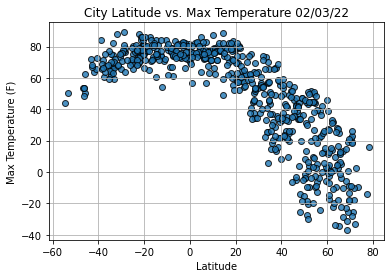

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

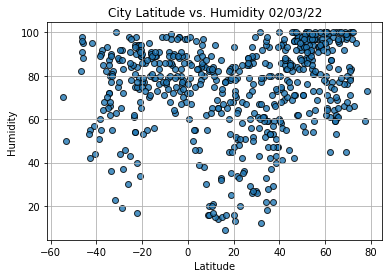

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

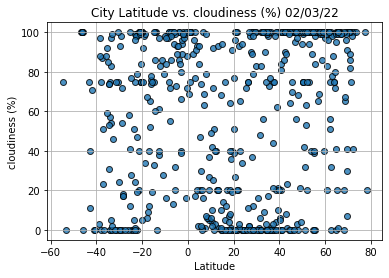

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

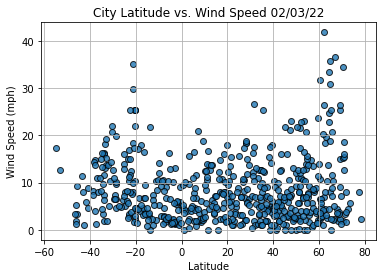

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()